###### Explain what a cost function is.
###### understanding of derivatives.
###### Should be able to explain the effects of having different learning rates.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('assignment2_data.csv',header=None,)

In [ ]:
df.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df_matrix=np.array(df.values)

In [ ]:
x=df_matrix[:,0].reshape(100,1)

y=df_matrix[:,1].reshape(100,1)

In [ ]:
x=x/np.max(x) # normalizing

ones=np.ones((100,1))

x=np.concatenate((x,ones),axis=1)

x[:5,:] # training set first fivr rows

array([[0.46203495, 1.        ],
       [0.75948521, 1.        ],
       [0.87468075, 1.        ],
       [0.67488683, 1.        ],
       [0.85027071, 1.        ]])

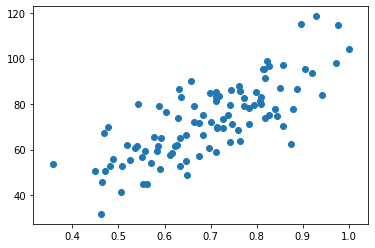

In [ ]:
plt.scatter(x[:,0],y)

### linearregression equation is ==>  theta_one*x + theta_two = y

### cost function  is equal to sum of squares of residuals devided by twice of total number of observations
#### residual = predicted - actual
# cost=(1/2m)* np.sum((np.dot(x,theta)-y)**2,axis=0)

In [ ]:
# function for linear regression calculation

def linear_regressor(x,y,alpha,iteration):
    
    theta=np.ones((2,1)) # initialize theta
    
    m= np.shape(x)[0]
    
    for i in range(iteration):
        temp_theta_one=np.sum((alpha/m)*(np.dot(x,theta)-y)*theta[0,0],axis=0) # derivative of theta one
        temp_theta_two=np.sum((alpha/m)*(np.dot(x,theta)-y),axis=0)  # derivative of theta two
    
        theta[0,0]=theta[0,0]- temp_theta_one
        theta[1,0]=theta[1,0]-temp_theta_two
        
    cost=(1/(2*m))* np.sum((np.dot(x,theta)-y)**2,axis=0)
    
    return [theta,cost]

In [ ]:
result=linear_regressor(x,y,0.01,100)

print("from function we get theta which gives best fit")
print('theta_one: ',result[0][0])
print('theta_one: ',result[0][1])

print('cost: ',result[1])

from function we get theta which gives best fit
theta_one:  [94.82202599]
theta_one:  [6.74232692]
cost:  [55.15927969]


Text(0.5, 1.0, 'alpha(learning rate) VS Cost')

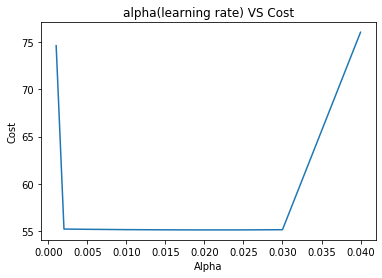

In [ ]:
alphas=[0.04,0.03,0.025,0.02,0.015,0.01,0.005,0.004,0.003,0.002,0.001]
costs=[]

for k in alphas:
    costs.append(float(linear_regressor(x,y,k,100)[1]))
    
plt.plot(alphas,costs)    
plt.xlabel('Alpha')
plt.ylabel('Cost')
plt.title('alpha(learning rate) VS Cost')


### from the above plot it can ne inferred that if alpha is very small training stop before reaching global minima  and if alpha is very large we will overshoot global minima. So we must select optimum value of alpha . In our case alpha=0.01 give good result